# Visualização região integrada do Distrito Federal

In [0]:
!pip install geopandas

In [0]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
pd.set_option("display.max_rows", 3000)

## Lendo csv com o valor médio recebido por cidade

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df1.csv')

In [0]:
df.shape

(2720, 3)

## Lendo shp com as 34 cidades da RIDE

In [0]:
geodf = gpd.read_file('/content/drive/My Drive/Colab Notebooks/DadosShp/rideTotal2.shp')
geodf.head()

,NM_MUNICIP,CD_GEOCODM,geometry
0,BRASILIA,5300108,"POLYGON ((-48.11521 -15.83216, -48.11528 -15.8..."
1,BRASILIA,5300108,"POLYGON ((-47.75060 -15.91208, -47.75078 -15.9..."
2,BRASILIA,5300108,"POLYGON ((-47.94150 -15.78556, -47.94286 -15.7..."
3,BRASILIA,5300108,"POLYGON ((-47.59732 -15.62285, -47.59822 -15.6..."
4,BRASILIA,5300108,"POLYGON ((-48.18601 -15.65986, -48.18624 -15.6..."


In [0]:
#Transformar geodf para um dataframe pandas
df_temp = pd.DataFrame(geodf)

In [0]:
df_temp.shape

(370, 3)

## Fazendo o merge entre os dataframes df e df_temp
- Objetivo: criar um dataframe contendo os valores médios por cidade e a coluna geometry para ser possivel plotar um choropleath

In [0]:
df_result =  pd.merge(left=df, right=df_temp,left_on='NOME_MUNICIPIO', right_on='NM_MUNICIP', how='inner')

In [0]:
df_result.shape

(29520, 6)

In [0]:
df_result.groupby('NOME_MUNICIPIO').head(1)

In [0]:
#Transformando o df_result para um dataframe do tipo geodataframe
geodataframe = gpd.GeoDataFrame(df_result)

In [0]:
del geodataframe['NM_MUNICIP']
geodataframe.head()

,MES_REFERENCIA,NOME_MUNICIPIO,VALOR_PARCELA,CD_GEOCODM,geometry
0,201301,AGUA FRIA DE GOIAS,131.054152,5200175,"POLYGON ((-47.47221 -14.80512, -47.47340 -14.8..."
1,201302,AGUA FRIA DE GOIAS,132.007207,5200175,"POLYGON ((-47.47221 -14.80512, -47.47340 -14.8..."
2,201303,AGUA FRIA DE GOIAS,136.833333,5200175,"POLYGON ((-47.47221 -14.80512, -47.47340 -14.8..."
3,201304,AGUA FRIA DE GOIAS,136.072993,5200175,"POLYGON ((-47.47221 -14.80512, -47.47340 -14.8..."
4,201305,AGUA FRIA DE GOIAS,136.819013,5200175,"POLYGON ((-47.47221 -14.80512, -47.47340 -14.8..."


## Visualização: Região Integrada do Distrito Federal (RIDE)
- **Valor médio recebido por cidade**

In [0]:
geodataframe.shape

(29520, 5)

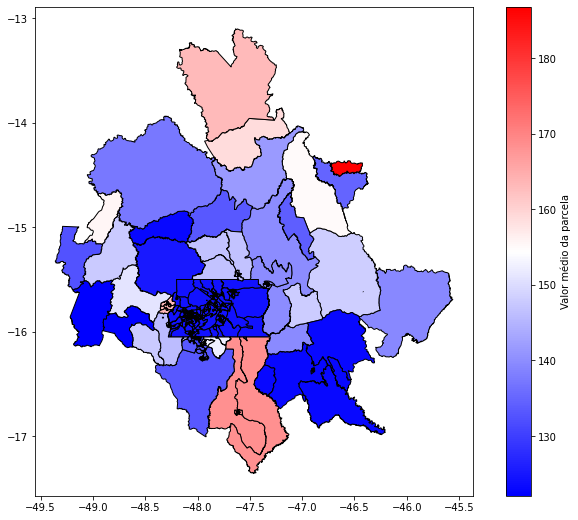

In [0]:
geodataframe.loc[geodataframe['MES_REFERENCIA'] == 201402].plot(figsize=(12,9),edgecolor='black',column='VALOR_PARCELA', legend=True, legend_kwds={'label': "Valor médio da parcela",'orientation':"vertical" }, cmap='bwr')
plt.show()

## Arquivo GeoJSON

In [0]:
import fiona
import json

In [95]:
geodataframe.loc[geodataframe['MES_REFERENCIA'] == 201402]

,MES_REFERENCIA,NOME_MUNICIPIO,VALOR_PARCELA,CD_GEOCODM,geometry
13,201402,AGUA FRIA DE GOIAS,133.369912,5200175,"POLYGON ((-47.47221 -14.80512, -47.47340 -14.8..."
197,201402,AGUAS LINDAS DE GOIAS,163.455959,5200258,"POLYGON ((-48.21078 -15.71986, -48.21080 -15.7..."
198,201402,AGUAS LINDAS DE GOIAS,163.455959,5200258,"POLYGON ((-48.26486 -15.73239, -48.26583 -15.7..."
199,201402,AGUAS LINDAS DE GOIAS,163.455959,5200258,"POLYGON ((-48.28181 -15.78164, -48.28230 -15.7..."
200,201402,AGUAS LINDAS DE GOIAS,163.455959,5200258,"POLYGON ((-48.21320 -15.74834, -48.21321 -15.7..."
201,201402,AGUAS LINDAS DE GOIAS,163.455959,5200258,"POLYGON ((-48.25381 -15.73791, -48.25382 -15.7..."
202,201402,AGUAS LINDAS DE GOIAS,163.455959,5200258,"POLYGON ((-48.29001 -15.69941, -48.29007 -15.6..."
203,201402,AGUAS LINDAS DE GOIAS,163.455959,5200258,"POLYGON ((-48.28249 -15.73542, -48.28397 -15.7..."
204,201402,AGUAS LINDAS DE GOIAS,163.455959,5200258,"POLYGON ((-48.24060 -15.79816, -48.24062 -15.7..."
205,201402,AGUAS LINDAS DE GOIAS,163.455959,5200258,"POLYGON ((-48.29527 -15.75059, -48.29530 -15.7..."


In [0]:
geodataframe.loc[geodataframe['MES_REFERENCIA'] == 201402].to_file('ride.geojson', driver='GeoJSON')


In [97]:
#Lendo arquivo geojson
with open('/content/ride.geojson') as file:
    ride = json.load(file)

ride["features"][0]

{'geometry': {'coordinates': [[[-47.472211, -14.805115],
    [-47.473403, -14.80656],
    [-47.475067, -14.809374],
    [-47.476382, -14.812996],
    [-47.478404, -14.817346],
    [-47.478961, -14.820881],
    [-47.481427, -14.826952],
    [-47.486545, -14.836023],
    [-47.489323, -14.840108],
    [-47.490202, -14.842607],
    [-47.491232, -14.848806],
    [-47.491596, -14.854786],
    [-47.491098, -14.8642],
    [-47.492073, -14.87591],
    [-47.494014, -14.886203],
    [-47.495093, -14.889291],
    [-47.495843, -14.895808],
    [-47.497876, -14.900342],
    [-47.49788, -14.902899],
    [-47.499623, -14.907125],
    [-47.50587, -14.914329],
    [-47.516476, -14.92341],
    [-47.538097, -14.931341],
    [-47.539962, -14.931445],
    [-47.54232, -14.930661],
    [-47.546818, -14.926454],
    [-47.548321, -14.925921],
    [-47.551487, -14.927671],
    [-47.553406, -14.930419],
    [-47.555765, -14.935334],
    [-47.557924, -14.936078],
    [-47.562459, -14.936662],
    [-47.564398, -14.

# **Visualização Interativa**

In [0]:
!pip install -U plotly

In [0]:
import plotly.express as px

In [0]:
fig = px.choropleth(df, geojson=ride,color="VALOR_PARCELA",
            locations="NOME_MUNICIPIO",featureidkey="properties.NOME_MUNICIPIO",
            projection="mercator"
            )

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
fig = px.choropleth(df, geojson=ride,color="VALOR_PARCELA",
            locations="NOME_MUNICIPIO",
            color_continuous_scale="Viridis",
            range_color=(0, 12)           
            )


fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [0]:
df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth(df, geojson=geojson, color="Bergeron",
                    locations="district", featureidkey="properties.district",
                    projection="mercator"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()